In [1]:
import pandas as pd
from glob import glob

In [2]:
path_list = glob('data/csv/*.csv')
path_list

['data/csv/울산광역시.csv',
 'data/csv/부산광역시_003.csv',
 'data/csv/광주광역시.csv',
 'data/csv/부산광역시_001.csv',
 'data/csv/인천광역시.csv',
 'data/csv/서울특별시.csv',
 'data/csv/부산광역시_004.csv',
 'data/csv/부산광역시_002.csv']

In [3]:

for i, path in enumerate(path_list):
    if i == 0:
        df = pd.read_csv(path)
        
        df = df[['labels', 'data_path']]
        
        df_2 = df[df['labels']==2]
        df_yes_2 = df_2.sample(frac=0.25)
        df_yes_2 = df_yes_2.sample(frac=0.5)
        
#         df_4 = df[df['labels']==4]
        
        df_not_2_not_4 = df[df['labels']!=2]
#         df_not_2_not_4 = df_not_2_not_4[df_not_2_not_4['labels']!=4]

        df = pd.concat([df_not_2_not_4, df_yes_2])
#         df = pd.concat([df_not_2_not_4, df_yes_2, df_yes_4])
    else:
        df_else = pd.read_csv(path)
        
        df_else = df_else[['labels', 'data_path']]
        
        df_2 = df_else[df_else['labels']==2]
        df_yes_2 = df_2.sample(frac=0.25)
        df_yes_2 = df_yes_2.sample(frac=0.5)
        
#         df_4 = df[df['labels']==4]
        
        df_not_2_not_4 = df[df['labels']!=2]
#         df_not_2_not_4 = df_not_2_not_4[df_not_2_not_4['labels']!=4]
        
        df_else = pd.concat([df_not_2_not_4, df_yes_2])
#         df_else = pd.concat([df_not_2_not_4, df_yes_2, df_yes_4])
        
        df = pd.concat([df, df_else])

In [4]:
df_groupby = df.groupby(['labels'])['data_path'].nunique()

In [5]:
df_groupby

labels
0     8023
1     1419
2    50833
3      841
4    21748
5     4234
6     1567
7     5036
Name: data_path, dtype: int64

<AxesSubplot:xlabel='labels'>

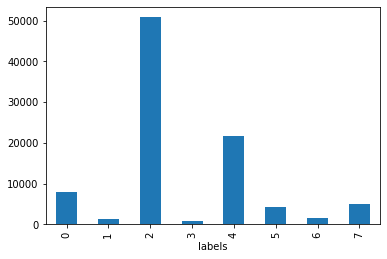

In [6]:
df_groupby.plot.bar(x='labels')

In [7]:
df_groupby.sum()

93701